# <div align="center">Real-Time Evolution of the TFIM in one Dimension</div>

The time evolution for a time-independent Hamiltonian for an arbitrary $|\Psi\rangle$ state with initial state $|\Psi(0)\rangle$ for some time $t$ can be described as follows
\begin{align}
|\Psi(t) \rangle = \dfrac{U | \Psi (0)\rangle}{\sqrt{|\langle \Psi(t)|\Psi(t)\rangle|}}
\end{align}
where $U = e^{-iHt}$ is the unitary time evolution operator and $H$ the Hamiltonian of the system of interest. The time evolution leads to a change in phase of the initial state, however the energy expectation value does not change.

The time evolution of the initial state $|\Psi(0)\rangle$ can be performed anageously to the imaginary-time evolution for finding the ground state, with the only difference, that the unitary operators $U_1$, $U_2$, $U_3$ have now a different form.
After performing the same steps in applying the tensors as for the imaginary-time evolution, one reaches a new state $|\Psi(t)\rangle$ in the Hilbert space.

In [1]:
# import self-made MPS/MPO functions
from MPSfunc_lib import *

## Part 1: Analysis Energy Expectation Value

In [2]:
#time evolution of a given state
N = 5
J = 1
beta = 1
dt = 0.01
steps = 200
t = dt*steps

#initial state: random normalized state
bonddims = gen_bonddims(N, 3)
start = genMPS(bonddims)
right_normalizeMPS(start)

#current date stamp
now = datetime.now().strftime("%y%m%d%H%M%S")
energies, stop = evolveInTimeEval(start, J, beta, dt, steps, eps_trunc=1e-4, Dmax=10)

#hamiltonian
hamiltonian = genH(len(start), J, beta)
start_energy = getEnergyExpVal(start, hamiltonian)
stop_energy = getEnergyExpVal(stop, hamiltonian)

#energy expectation value deviation from initial to final state
print("\nEnergy deviation: ", np.abs(start_energy-stop_energy))


Energy deviation:  0.0


In [3]:
#data files
data_file = f"./out/run_time_evol_eval_N{N}_J{J}_beta{beta}_t{t}_dt{dt}_{now}.txt"
#file in which the selected results can be stored in the folder data
store_file = f"./out/data/time_evol_Evst_N{N}_J{J}_beta{beta}.txt"

mean: 0.9999921145125097


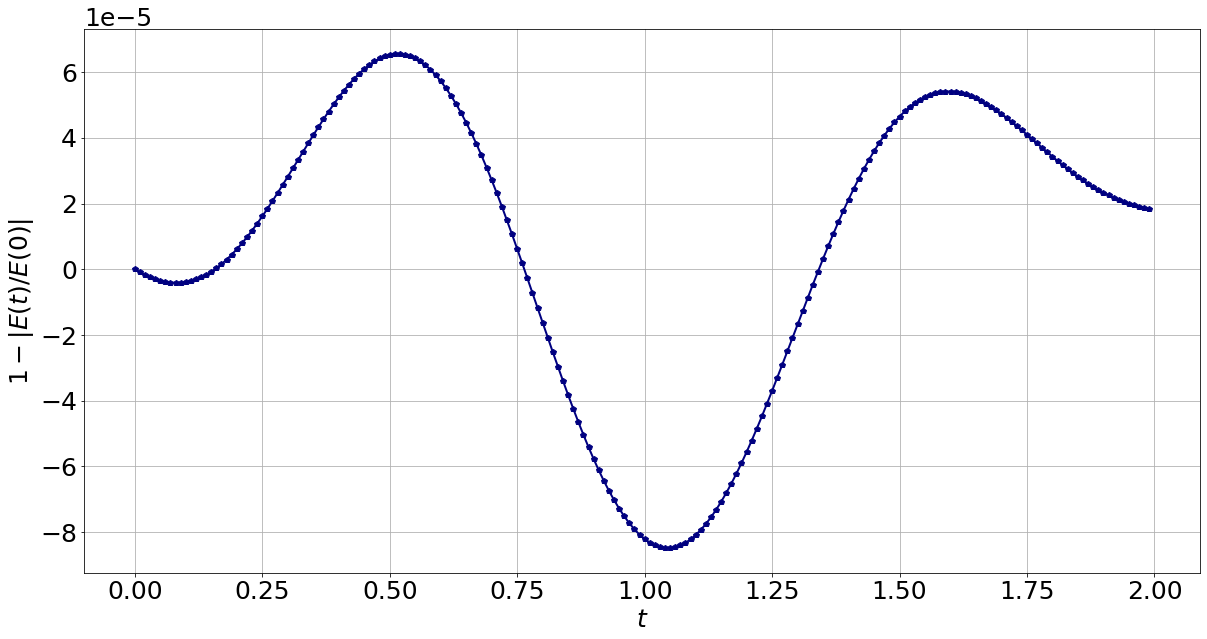

In [4]:
#plot energy expectation value 
fig, ax = mp_canvas(10, 2/1)
ax.set_ylabel(r'$1-|E(t)/E(0)|$')
ax.set_xlabel("$t$")

#extract data
x, y = extract_params_from_file(data_file, store_file, "[itstep]", [1,3])
ts = dt*np.array(x)

ax.plot(ts, 1-np.abs((np.array(y)/y[0])), 'p-', label=r'$\Delta E / \delta t$', 
        color='navy', linewidth=2)

print("mean:", np.sum(np.abs((np.array(y)/y[0])))/steps)

#mp_savePDF("./results/energy_vs_t_time_evolution", fig)

### Results from Cluster
The analysis was performed using the **Python**-Script _MPS_Program_real_time_evolution.py_, for different $N\in\lbrace10,30,50,70\rbrace$ and time steps $\delta t\in\lbrace0.1, 0.01\rbrace$ and number of steps$\in\lbrace 20, 200\rbrace$. The output in form of the energy expectation value was extracted from the log file **./out/run_time_evol_N{N}_J{J}_beta{beta}_t{evol_time}_{now}.txt**.

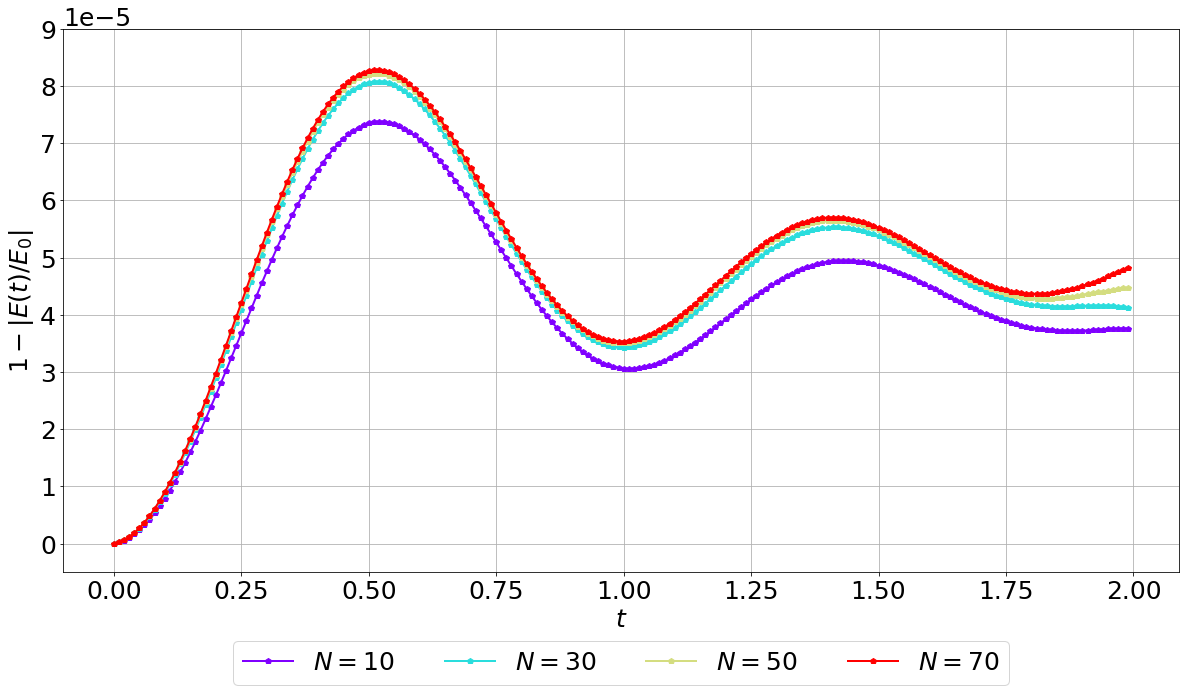

In [5]:
#plot deviation energy expectation value for different N for J/beta=1 
fig, ax = mp_canvas(10, 2/1)
ax.set_ylabel(r'$1-|E(t)/E_0|$')
ax.set_xlabel("$t$")
plt.ylim(-0.000005, 0.00009)
plt.yticks([0, 0.00001, 0.00002, 0.00003, 0.00004, 0.00005, 0.00006, 0.00007, 0.00008, 0.00009]) 

Ns = [10,30,50,70]
xvec = []
yvec = []

for i in range(len(Ns)):
    store_file = f"./out/data/time_evol_Evst_N{Ns[i]}_J{1}_beta{1}.txt"
    fn = f"../Data/real_time_evol/run_time_evol_eval_N{Ns[i]}_J1.0_beta1.0_t2.0_dt0.01.txt"
    x, y = extract_params_from_file(fn, store_file, "[itstep]", [1,3])
    ts = 0.01*np.array(x)
    data = np.abs((np.array(y)/y[0]))
    xvec.append(ts)
    yvec.append(data)

color=iter(cm.rainbow(np.linspace(0,1,len(Ns))))
for i in range(len(Ns)):
    col=next(color)
    ax.plot(xvec[i], 1-yvec[i], 'p-', label=r"$N=$"+str(Ns[i]), color=col, linewidth=2)    
plt.legend(bbox_to_anchor=[0.5, -0.23], loc='lower center', ncol=5)

#mp_savePDF("./results/energy_vs_t_time_evolution_diffN", fig)

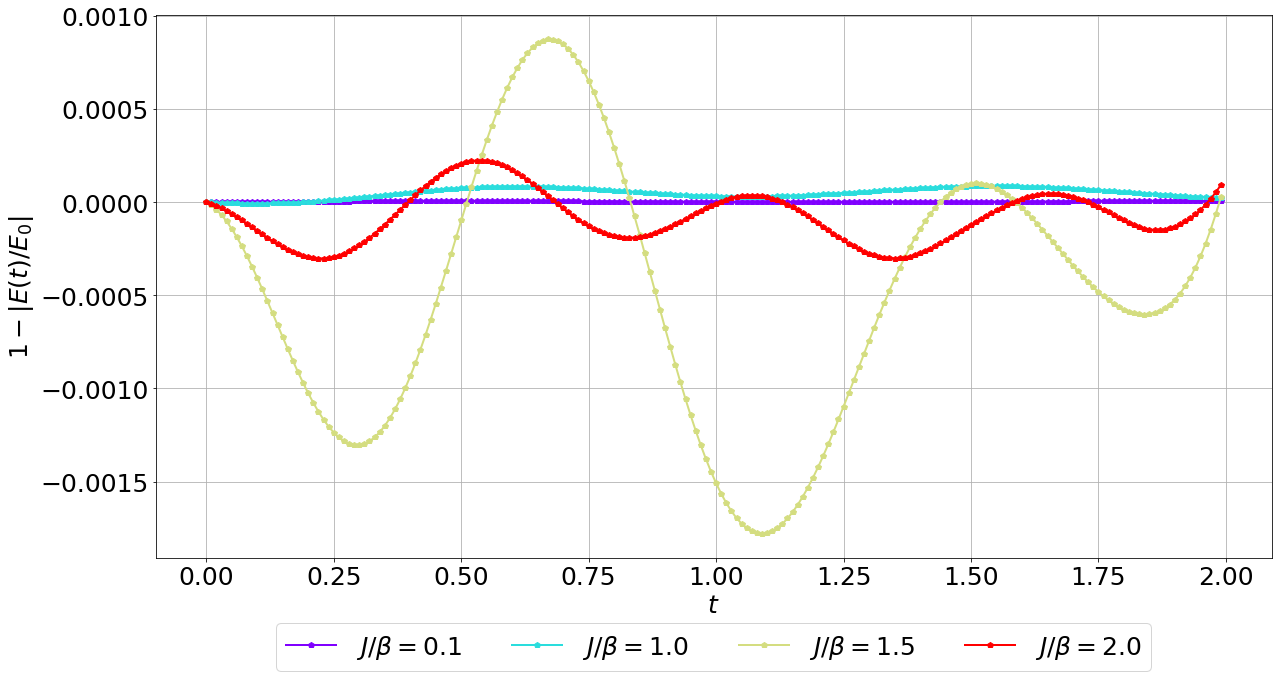

In [6]:
#plot deviation energy expectation value for N=10 and different J/beta 
fig, ax = mp_canvas(10, 2/1)
ax.set_ylabel(r'$1-|E(t)/E_0|$')
ax.set_xlabel("$t$")

J = np.array([0.1, 1, 1.5, 2])
xvec = []
yvec = []

for i in range(len(J)):
    store_file = f"./out/data/time_evol_Evst_N{N}_J{J[i]}_beta{1}.txt"
    fn = f"../Data/real_time_evol/run_time_evol_eval_N10_J{J[i]}_beta1_t2.0_dt0.01.txt"
    x, y = extract_params_from_file(fn, store_file, "[itstep]", [1,3])
    ts = 0.01*np.array(x)
    data = np.abs((np.array(y)/y[0]))
    xvec.append(ts)
    yvec.append(data)

color=iter(cm.rainbow(np.linspace(0,1,len(J))))
for i in range(len(J)):
    col=next(color)
    ax.plot(xvec[i], 1-yvec[i], 'p-', label=r"$J/\beta=$"+str(J[i]), color=col, linewidth=2) 
plt.legend(bbox_to_anchor=[0.5, -0.23], loc='lower center', ncol=5)

#mp_savePDF("./results/energy_vs_t_time_evolution_diffJbeta", fig)

## Part 2: Analysis Error in Energy 
Two kinds of errors are examined for $J/\beta=1$
- Error in energy per site:
    \begin{align}
        \dfrac{|E(t)-E_0|}{N^2}
    \end{align}
    
- Relative error energy expectation value:
    \begin{align}
        \dfrac{|E(t)-E_0|}{|E_0|}
    \end{align}
    
The analysis was performed using the **Python**-Scripts ...

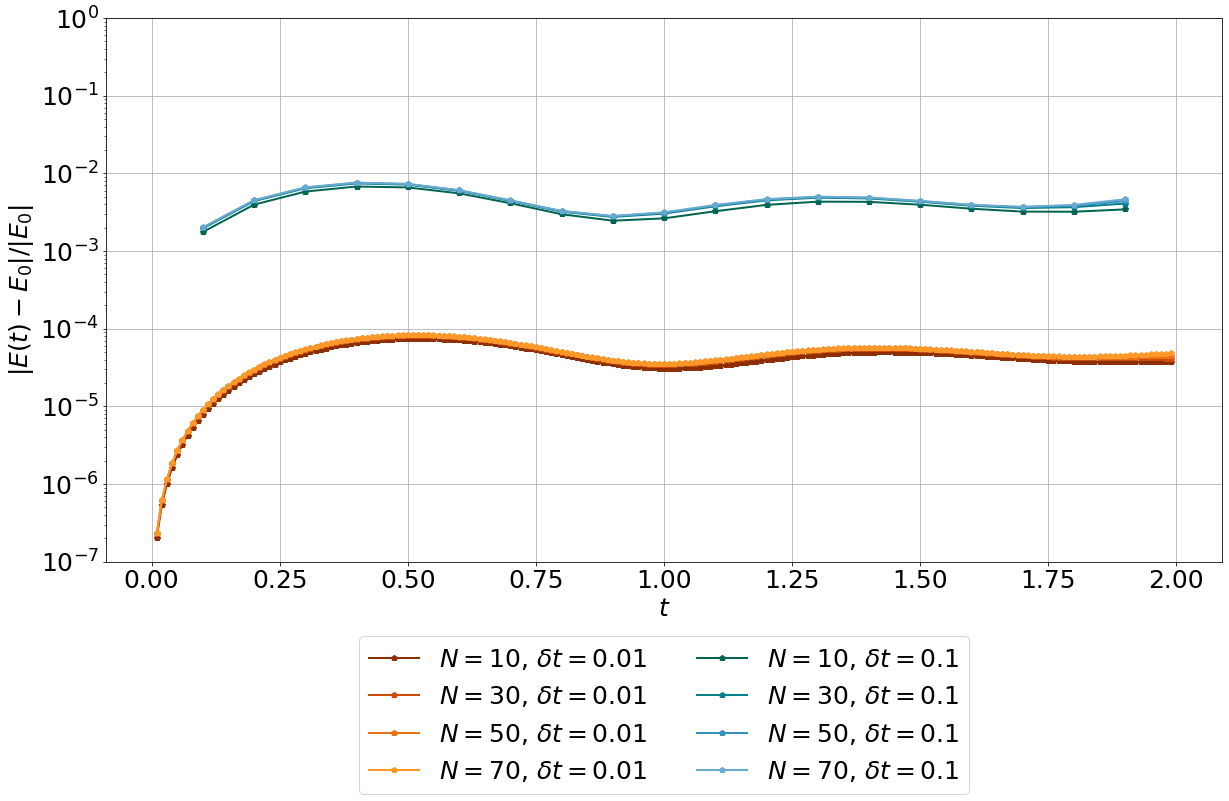

In [7]:
#plot errors for dt = 0.1, 0.01 and maximal evolution time t = 2 -> steps = 20, 200
fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r'$|E(t)-E_0|/|E_0|$')
plt.yscale('log')
plt.ylim(0.0000001, 1)
plt.yticks([0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]) 

Ns = [10,30,50,70]
xvec = []
xvec1 = []
yvec = []
yvec1 = []

store_file = f"./out/data/time_evol_Evst_N{10}_J{1}_beta{1}.txt"
for i in range(len(Ns)):
    fn = f"../Data/real_time_evol/run_time_evol_eval_N{Ns[i]}_J1.0_beta1.0_t2.0_dt0.01.txt"
    fn1 = f"../Data/real_time_evol/run_time_evol_eval_N{Ns[i]}_J1.0_beta1.0_t2.0_dt0.1.txt"
    x, y = extract_params_from_file(fn, store_file, "[itstep]", [1,3])
    x1, y1 = extract_params_from_file(fn1, store_file, "[itstep]", [1,3])
    
    ts = 0.01*np.array(x[1:len(x)])
    ts1 = 0.1*np.array(x1[1:len(x1)])
    dataE = np.abs((np.array(y[1:(len(y))])-y[0])/y[0])
    dataE1 = np.abs((np.array(y1[1:(len(y1))])-y1[0])/y1[0])
    xvec.append(ts)
    xvec1.append(ts1)
    yvec.append(dataE)
    yvec1.append(dataE1)

color = ["#8c2d04", "#cc4c02", "#ec7014", "#fe9929", "#fec44f"]
color1 = ["#016450", "#02818a", "#3690c0", "#67a9cf", "#a6bddb"]
for i in range(len(Ns)):
    col = color[i]
    ax.plot(xvec[i], yvec[i], 'p-', label=r"$N=$" + str(Ns[i]) + ", $\delta t = 0.01$", 
            color=col, linewidth=2)
for i in range(len(Ns)):
    col = color1[i]
    ax.plot(xvec1[i], yvec1[i], 'p-', label=r"$N=$" + str(Ns[i]) + ", $\delta t = 0.1$", 
            color=col, linewidth=2)
plt.legend(bbox_to_anchor=[0.5, -0.45], loc='lower center', ncol=2)

#mp_savePDF("./results/rel_err_energy_real_eval_diffN_diffdt", fig)

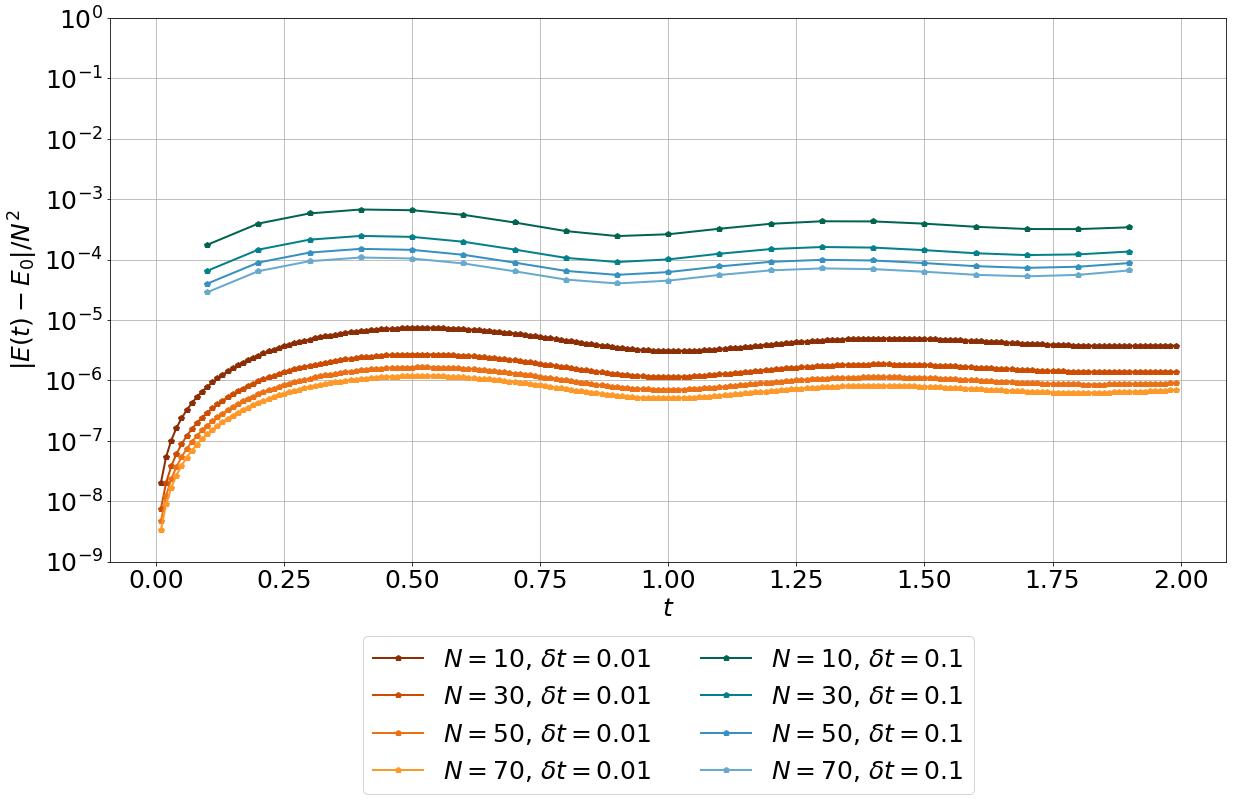

In [9]:
#plot errors for dt = 0.1, 0.01 and maximal evolution time t = 2 -> steps = 20, 200
fig, ax = mp_canvas(10, 2/1)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r'$|E(t)-E_0|/N^2$')
plt.yscale('log')
plt.ylim(0.000000001, 1)
plt.yticks([0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]) 

Ns = [10,30,50,70]
xvec = []
xvec1 = []
yvec = []
yvec1 = []

store_file = f"./out/data/time_evol_Evst_N{N}_J{J}_beta{beta}.txt"
for i in range(len(Ns)):
    fn = f"../Data/real_time_evol/run_time_evol_eval_N{Ns[i]}_J1.0_beta1.0_t2.0_dt0.01.txt"
    fn1 = f"../Data/real_time_evol/run_time_evol_eval_N{Ns[i]}_J1.0_beta1.0_t2.0_dt0.1.txt"
    x, y = extract_params_from_file(fn, store_file, "[itstep]", [1,3])
    x1, y1 = extract_params_from_file(fn1, store_file, "[itstep]", [1,3])    
    ts = 0.01*np.array(x[1:len(x)])
    ts1 = 0.1*np.array(x1[1:len(x1)])
    dataN = np.abs((np.array(y[1:(len(y))])-y[0]))/Ns[i]/Ns[i]
    dataN1 = np.abs((np.array(y1[1:(len(y1))])-y1[0]))/Ns[i]/Ns[i]
    xvec.append(ts)
    xvec1.append(ts1)
    yvec.append(dataN)
    yvec1.append(dataN1)

color = ["#8c2d04", "#cc4c02", "#ec7014", "#fe9929", "#fec44f"]
color1 = ["#016450", "#02818a", "#3690c0", "#67a9cf", "#a6bddb"]
for i in range(len(Ns)):
    col = color[i]
    ax.plot(xvec[i], yvec[i], 'p-', label=r"$N=$" + str(Ns[i]) + ", $\delta t = 0.01$", 
                color=col, linewidth=2)    
for i in range(len(Ns)):
    col = color1[i]
    ax.plot(xvec1[i], yvec1[i], 'p-', label=r"$N=$" + str(Ns[i]) + ", $\delta t = 0.1$", 
            color=col, linewidth=2)
plt.legend(bbox_to_anchor=[0.5, -0.45], loc='lower center', ncol=2)

#mp_savePDF("./results/error_energy_per_site_real_eval_diffN_diffdt", fig)